In [51]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
house=pd.read_csv("housing.csv")

In [56]:
house.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [57]:
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

def binary_map(x):
    return x.map({'yes':1,'no':0})

house[varlist] = house[varlist].apply(binary_map)

In [58]:
status = pd.get_dummies(house['furnishingstatus'],drop_first = True).astype('int')

house = pd.concat([house,status],axis=1)

house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [59]:
house.drop(['furnishingstatus'],axis=1,inplace=True)
house.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0


In [60]:
df_train,df_test=train_test_split(house,train_size=0.8,test_size=0.2,random_state=42)

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [62]:
num_var=['area','bedrooms','bathrooms','stories','parking','price']

df_train[num_var]=scaler.fit_transform(df_train[num_var])

df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
46,0.550000,0.298969,0.4,0.333333,1.000000,1,0,0,0,1,0.333333,0,0,0
93,0.433333,0.381443,0.4,0.333333,0.000000,1,0,1,0,1,1.000000,0,1,0
335,0.206667,0.148866,0.2,0.000000,0.000000,1,0,1,0,1,0.666667,0,0,0
412,0.160000,0.065979,0.4,0.000000,0.333333,1,0,1,0,0,0.000000,1,0,1
471,0.120000,0.144330,0.4,0.000000,0.333333,1,0,0,0,0,0.000000,0,0,1


In [63]:
y_train = df_train.pop('price')
x_train = df_train

In [64]:
from sklearn.feature_selection import RFE

In [73]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(x_train,y_train)

In [74]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', False, 3),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [76]:
col = x_train.columns[rfe.support_]
col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [78]:
x_train.columns[~rfe.support_]

Index(['guestroom', 'semi-furnished', 'unfurnished'], dtype='object')

In [79]:
x_train_rfe = x_train[col]

In [80]:
import statsmodels.api as sm
x_train_val = sm.add_constant(x_train_rfe)

In [81]:
x_train_new = x_train_rfe.drop(["bedrooms"],axis =1)
print(x_train_new.columns)

Index(['area', 'bathrooms', 'stories', 'mainroad', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')


In [84]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train_new)

In [87]:
lm = sm.OLS(y_train,x_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     98.38
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           3.12e-98
Time:                        10:45:49   Log-Likelihood:                 406.19
No. Observations:                 436   AIC:                            -792.4
Df Residuals:                     426   BIC:                            -751.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0276      0.014     

In [88]:
y_train_price = lm.predict(x_train_lm)

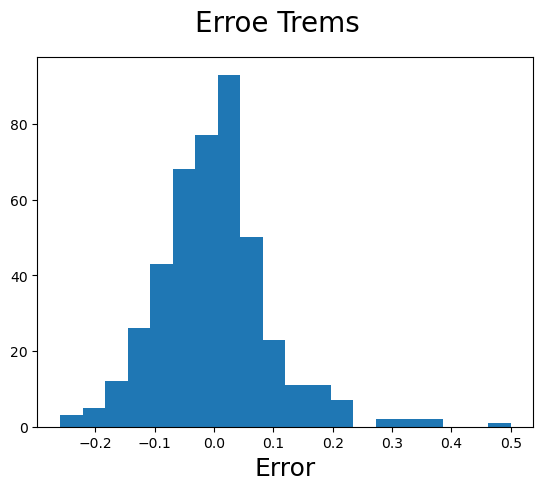

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure()
plt.hist((y_train - y_train_price), bins = 20)
fig.suptitle('Erroe Trems',fontsize = 20)
plt.xlabel('Error',fontsize = 18)
plt.show()

In [91]:
house.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0


In [94]:
num_var = ['area','bedrooms','bathrooms','stories','parking','price']
df_test[num_var]=scaler.transform(df_test[num_var])

In [95]:
y_test = df_test.pop('price')
x_test = df_test

x_test_new = x_test[x_train_new.columns]

x_test_new = sm.add_constant(x_test_new)

y_pred = lm.predict(x_test_new)

## MODEL EVALUATION

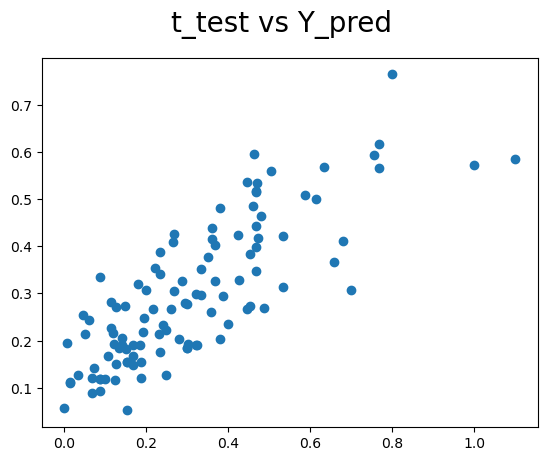

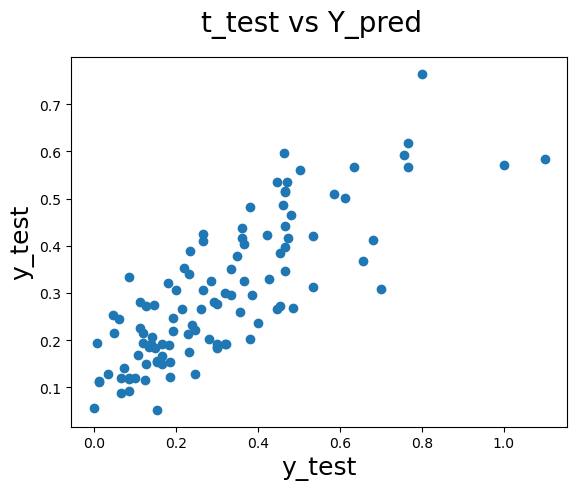

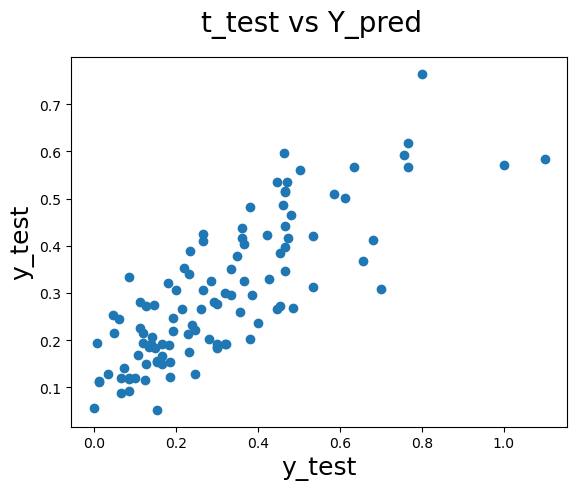

In [98]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle("t_test vs Y_pred",fontsize=20)
plt.xlabel("y_test",fontsize=18)
plt.ylabel("y_test",fontsize=18)
plt.show()